In [1]:
# Load all neccessary packages 
import pandas as pd
import warnings
import numpy as np
import sys
warnings.filterwarnings("ignore")
from noise_helpers.indicators import *
from noise_helpers.labels import *
from noise_helpers.is_class import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as tk
from matplotlib.ticker import PercentFormatter , NullFormatter
from collections import defaultdict
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker

## Regression 

In [3]:
data = pd.read_csv("./Data/data.csv")
#Remove invalid data samples 
data = data[(data["Leq"] != 0)]


columns = [ "weekday", "hour", "minute" , "is_holiday", "is_class"]
col_y = [ "NPL" ,   "Leq"  ,   "L10" ,   "L90" ,   "L50" ,  "NPL_4" ,   "Leq_4"  ,   "L10_4" ,   "L90_4" ,   "L50_4" , "NPL_10" ,   "Leq_10"  ,   "L10_10" ,   "L90_10" ,   "L50_10" ,"NPL_20" ,   "Leq_20"  ,   "L10_20" ,   "L90_20" ,   "L50_20" ,
          "NPL_30" ,   "Leq_30"  ,   "L10_30" ,   "L90_30" ,   "L50_30" , "NPL_60" ,   "Leq_60"  ,   "L10_60" ,   "L90_60" ,   "L50_60" , "NPL_120" ,   "Leq_120"  ,   "L10_120" ,   "L90_120" ,   "L50_120" , "NPL_180" ,   "Leq_180"  ,   "L10_180" ,   "L90_180" ,   "L50_180" ,
          "NPL_300" ,   "Leq_300"  ,   "L10_300" ,   "L90_300" ,   "L50_300" , "NPL_450" ,   "Leq_450"  ,   "L10_450" ,   "L90_450" ,   "L50_450" , "NPL_900" ,   "Leq_900"  ,   "L10_900" ,   "L90_900" ,   "L50_900"  ]


In [4]:
def q_map(d):
    if d == 15:
        return 1
    elif d == 30:
        return 2
    elif d == 45:
        return 3
    else:
        return 0
data["q_map"] = data["minute"].apply(q_map)

In [5]:
data.loc[data["week"] == 8].reset_index()["Leq"];

In [6]:
R2_pred = []
RMSE_pred = []
RMSE_pred450 = []
pr_importance = []
errors = []
errors_r = []

train = data.loc[data["week"] != 8].reset_index()
test = data.loc[data["week"] == 8].reset_index()

train_X = pd.DataFrame(train, columns=columns)
test_X = pd.DataFrame(test, columns=columns)
 
# for graph purpose 
test_g = test[test.dayofyear == 51]
test_g_x = pd.DataFrame(test_g, columns=columns)

for col in col_y:
    train_y = train[col]
    test_y = test[col]
    print ("Predictor"  , col)        
    rf = RandomForestRegressor(n_estimators=100, max_features = 5, min_samples_leaf= 1, n_jobs=8)
    rf.fit(train_X, train_y)
    pr_imp = rf.feature_importances_
    y_pred_reg = rf.predict(test_X)
    
    r2 = r2_score(test_y , y_pred_reg)
    rmse = np.sqrt (mean_squared_error(test_y, y_pred_reg))
    
    if len(col.split('_')) == 1:
        f = 2
    else:
        f = col.split('_')[1]
    
    ind = col.split('_')[0]
    
    n = 900/ int(f)
    
    rmse450 = np.sqrt (mean_squared_error(test[ind], y_pred_reg))


    for i in range(len(test_y)):
        E = test_y [i] - y_pred_reg[i]
        Er = test[ind][i] - y_pred_reg[i]
        
        errors.append([ind, E , n])
        errors_r.append([ind, Er , n])      

        print("R2 = ", r2)
        print ("RMSE = " , rmse)
        R2_pred.append([ind ,  r2, n])
        RMSE_pred.append([ind ,rmse, n])
        RMSE_pred450.append([ind ,rmse450, n])
        pr_importance.append(pr_imp)
        
    # for the graph     
    if ind =="Leq":
        if n == 450:
            y_pred_450 = rf.predict(test_g_x)
        elif n == 450:
            y_pred_30 = rf.predict(test_g_x)
        elif n == 225:
            y_pre_225 = rf.predict(test_g_x)
        elif n == 90:
            y_pred_90 = rf.predict(test_g_x)
        elif n ==45:
            y_pred_45 = rf.predict(test_g_x)
        elif n == 30:
            y_pred_30 = rf.predict(test_g_x)
        elif n == 15:
            y_pred_15 = rf.predict(test_g_x)
        elif n == 7.5:
            y_pred_7 = rf.predict(test_g_x)
        elif n == 5:
            y_pred_5 = rf.predict(test_g_x)

Predictor NPL
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.308184527906971

RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
R2 =  0.8098377427366894
RMSE =  3.3081845279069717
Predictor Leq
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE =  2.115193554475007
R2 =  0.8222488806540899
RMSE 

Predictor L10
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.295300870470619

RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.2953008704706197
R2 =  0.8444925699561121
RMSE =  2.29

R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505
R2 =  0.8446902895380028
RMSE =  1.72190961141505


R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124

RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.2883191182571463
R2 =  0.8124109228604854
RMSE =  3.28

R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =  2.014398157618487
R2 =  0.8364300034187786
RMSE =

R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =

RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 =  0.7967250831380784
RMSE =  1.439510230116672
R2 = 

R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956

R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
R2 =  0.7956857354871851
RMSE =  3.3923700049801346
Predictor Leq_10
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.0974509548016025
R2 =  0.8236288324512329
RMSE =  2.097450954801

Predictor L10_10
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.8354717177443071
RMSE =  2.341846753080715
R2 =  0.835471

R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651


R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
R2 =  0.802596162713239
RMSE =  1.428410920170651
Predictor L50_10
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.84246056373

R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424605637375906
RMSE =  1.7379364504183377
R2 =  0.8424

R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =

R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =  2.055278047187441
R2 =  0.8268646221745752
RMSE =

R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959

R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959457218432893
RMSE =  1.4725893088863817
R2 =  0.7959

R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847843772684131
RMSE =  3.4736036470934755
R2 =  0.7847

R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023326196333755
RMSE =  2.2509991908766342
R2 =  0.8023

Predictor L10_30
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994689274635
RMSE =  2.4546376265039047
R2 =  0.821994

R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056534397469006
RMSE =  1.4512892029548696
R2 =  0.8056

R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373

RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
R2 =  0.8373684261242413
RMSE =  1.7710032739861412
Predictor NPL_60
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.763508660017

R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635086600170122
RMSE =  3.5557134703408333
R2 =  0.7635

R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022
R2 =  0.805960957149415
RMSE =  2.195374478641022


RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
R2 =  0.8042901971101784
RMSE =  2.5432009186192777
Predictor L90_60
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.8010387331393177
RMSE =  1.5098932912850005
R2 =  0.801038733139

R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288970956249695
RMSE =  1.8248956872929882
R2 =  0.8288

R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =

RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 =  0.7294162852551914
RMSE =  3.765646212569823
R2 = 

Predictor L10_120
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.6899815974346017
R2 =  0.7812857243276741
RMSE =  2.68998159743

R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046

R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046399094790664
RMSE =  1.5528001487500205
R2 =  0.8046

R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554
R2 =  0.7348099737351308
RMSE =  3.59991343339554


R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812

R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
R2 =  0.7812329572920194
RMSE =  2.3499288258090445
Predictor L10_180
R2 =  0.7747982915453555
RMSE =  2.6889875762750184
R2 =  0.7747982915453555
RMSE =  2.6889875762750184
R2 =  0.7747982915453555
RMSE =  2.6889875762750184
R2 =  0.7747982915453555
RMSE =  2.6889875762750184
R2 =  0.7747982915453555
RMSE =  2.6889875762750184
R2 =  0.7747982915453555
RMSE =  2.68898757627

R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952217118866948
RMSE =  1.6663819608495454
R2 =  0.7952

R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151676926962501
RMSE =  1.9488062837519873
R2 =  0.8151

R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =

RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 =  0.6522208861511565
RMSE =  3.822191950436667
R2 = 

R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
R2 =  0.729823144197248
RMSE =  2.569960007502039
Predictor L10_300
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.7175923801934061
RMSE =  2.8818763693305702
R2 =  0.717592380193

R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =  1.789091119632712
R2 =  0.7861635723878644
RMSE =

R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383


R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383
R2 =  0.770772277661418
RMSE =  2.167115161368383


R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916403012181526
RMSE =  3.4020066125289703
R2 =  0.5916

R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826

R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826172402787078
RMSE =  3.6201921849507266
R2 =  0.5826

R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =  3.155931381805457
R2 =  0.6151867615526438
RMSE =

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Text(0.5, 1.0, 'Day 54')

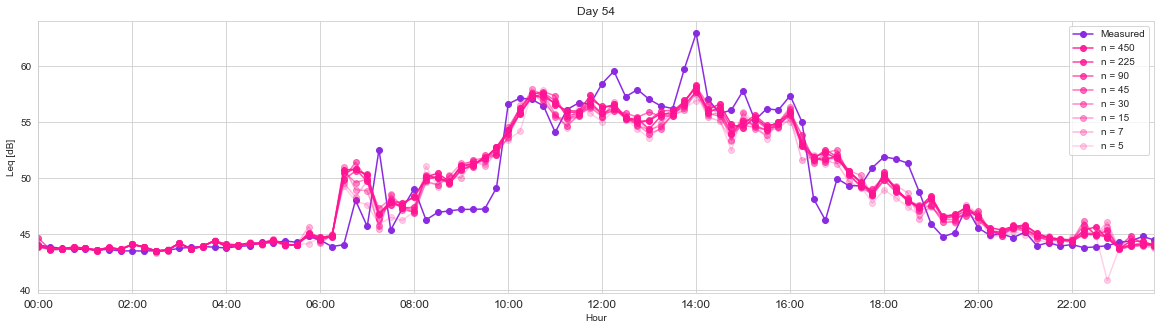

In [8]:
sns.set_style("whitegrid")
sns.set_palette(["deeppink"])

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

plt.plot(test_g["Quarter"] , test_g["Leq"], marker = 'o', label="Measured" , alpha = 1 , color = "blueviolet")

plt.plot(test_g["Quarter"] , y_pred_450, marker = 'o', alpha=0.9 , label = 'n = 450')
plt.plot(test_g["Quarter"] , y_pre_225, marker = 'o', alpha=0.8 , label ='n = 225')
plt.plot(test_g["Quarter"] , y_pred_90, marker = 'o', alpha=0.7 , label = 'n = 90')
plt.plot(test_g["Quarter"] , y_pred_45, marker = 'o', alpha=0.6 , label = 'n = 45')
plt.plot(test_g["Quarter"] , y_pred_30, marker = 'o' , alpha=0.5 , label = 'n = 30')
plt.plot(test_g["Quarter"] , y_pred_15, marker = 'o', alpha=0.4 , label = 'n = 15')
plt.plot(test_g["Quarter"] , y_pred_7, marker = 'o', alpha=0.3 , label = 'n = 7')
plt.plot(test_g["Quarter"] , y_pred_5, marker = 'o', alpha=0.2 , label = 'n = 5')


column_order = [ '0:0', '0:15', '0:30', '0:45',
       '1:0', '1:15', '1:30', '1:45', '2:0', '2:15', '2:30', '2:45',
       '3:0', '3:15', '3:30', '3:45', '4:0', '4:15', '4:30', '4:45',
       '5:0', '5:15', '5:30', '5:45', '6:0', '6:15', '6:30', '6:45',
       '7:0', '7:15', '7:30', '7:45', '8:0', '8:15', '8:30', '8:45',
       '9:0', '9:15', '9:30', '9:45', '10:0', '10:15', '10:30', '10:45',
       '11:0', '11:15', '11:30', '11:45', '12:0', '12:15', '12:30',
       '12:45', '13:0', '13:15', '13:30', '13:45', '14:0', '14:15',
       '14:30', '14:45', '15:0', '15:15', '15:30', '15:45', '16:0', 
       '16:15', '16:30', '16:45', '17:0', '17:15', '17:30',
       '17:45', '18:0', '18:15', '18:30', '18:45', '19:0', '19:15',
       '19:30', '19:45', '20:0', '20:15', '20:30', '20:45', '21:0',
       '21:15', '21:30', '21:45', '22:0', '22:15', '22:30', '22:45',
       '23:0', '23:15', '23:30', '23:45']

hours = ['0:0', '', '', '',
       '', '', '', '', '2:0', '', '', '',
       '', '', '', '', '4:0', '', '', '',
       '', '', '', '', '6:0', '', '', '',
       '', '', '', '', '8:0', '', '', '',
       '', '', '', '', '10:0', '', '', '',
       '', '', '', '', '12:0', '', '',
       '', '', '', '', '', '14:0', '',
       '', '', '', '', '', '', '16:0', 
       '', '', '', '', '', '',
       '', '18:0', '', '', '', '', '',
       '', '', '20:0', '', '', '', '',
       '', '', '', "22:0", '', '', '',
       '', '', '', '' ]

hours2 = ['00:00', '', '', '',
       '', '', '', '', '02:00', '', '', '',
       '', '', '', '', '04:00', '', '', '',
       '', '', '', '', '06:00', '', '', '',
       '', '', '', '', '08:00', '', '', '',
       '', '', '', '', '10:00', '', '', '',
       '', '', '', '', '12:00', '', '',
       '', '', '', '', '', '14:00', '',
       '', '', '', '', '', '', '16:00', 
       '', '', '', '', '', '',
       '', '18:00', '', '', '', '', '',
       '', '', '20:00', '', '', '', '',
       '', '', '', "22:00", '', '', '',
       '', '', '', '' ]

plt.xticks(hours , hours2,  fontsize=12)
plt.margins(x=0)

plt.legend()
plt.xlabel("Hour")
plt.ylabel("Leq [dB]")

plt.title ('Day 54')

In [9]:
reg_results_rmse = pd.DataFrame(RMSE_pred, columns=["Indicator", "RMSE", "n"])
reg_results_rmse450 = pd.DataFrame(RMSE_pred450, columns=["Indicator", "RMSE", "n"])

reg_results_r2 = pd.DataFrame(R2_pred, columns=["Indicator", "R2", "n"])
errors_df = pd.DataFrame(errors, columns = ["Indicator", "Error", "N"])
errors_er_df = pd.DataFrame(errors_r, columns = ["Indicator", "Error", "N"])

errors_er_df;

In [10]:
pd.DataFrame (pr_importance , columns= columns).mean()

weekday       0.325657
hour          0.188501
minute        0.039585
is_holiday    0.128981
is_class      0.317276
dtype: float64

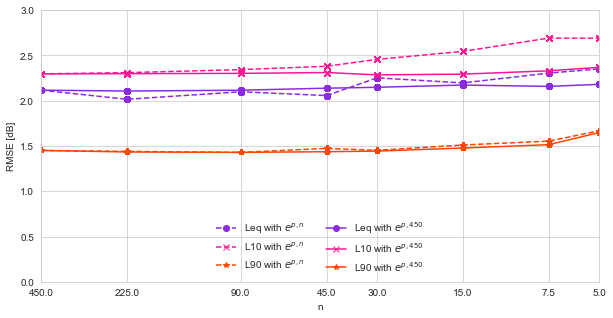

In [12]:
sns.set_style("whitegrid")


fig, ax = plt.subplots()

#plt.rcParams['figure.figsize'] = 16,16

fig.set_size_inches(10, 5)

sns.set_palette(["blueviolet",  "deeppink" , "orangered"])

plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "Leq"], label = "Leq with $e^{p,n}$ ", linestyle='--' , marker = 'o')
plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "L10"], label = "L10 with $e^{p,n}$", linestyle='--' , marker = 'x')
plt.plot("n", "RMSE", data=reg_results_rmse[reg_results_rmse["Indicator"] == "L90"], label = "L90 with $e^{p,n}$", linestyle='--' , marker = '*' )
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "Leq"], label = "Leq with $e^{p,450}$ ",marker = 'o' )
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "L10"], label = "L10 with $e^{p,450}$" , marker = 'x')
plt.plot("n", "RMSE", data=reg_results_rmse450[reg_results_rmse450["Indicator"] == "L90"], label = "L90 with $e^{p,450}$ " ,  marker = '*' )

plt.legend()
plt.xscale('log')
plt.xlabel("n")
plt.ylabel("RMSE [dB]")

ax.set_xticks(errors_er_df["N"].unique())
ax.get_xaxis().set_major_formatter(tk.ScalarFormatter())
ax.set_xlim(450,5)
ax.set_ylim(0,3)
ax.legend(frameon=False, loc='lower center', ncol=2)

## Classification

In [13]:
d1_n = defaultdict(list)
d2_450 = defaultdict(list)

In [14]:
col_y = ["CQI_indicator", "CQI_indicator_4", "CQI_indicator_10", "CQI_indicator_20", "CQI_indicator_30",
"CQI_indicator_60", "CQI_indicator_120", "CQI_indicator_180", "CQI_indicator_300", "CQI_indicator_450", "CQI_indicator_900"]

F1_cl = []
F1_cl450 = []
importance = []

train = data.loc[data["week"] != 8].reset_index() 
test = data.loc[data["week"] == 8].reset_index()

train_X = pd.DataFrame(train, columns=columns)
test_X = pd.DataFrame(test, columns=columns)
test450 = test[col_y[0]]

# for graph purpose 
test_g = test[test.dayofyear == 51]
test_g_x = pd.DataFrame(test_g, columns=columns)

for col in col_y:
    train_y = train[col]
    test_y = test[col]
    
    print (test_y.unique())
    print ("Predictor"  , col)        
    clf = RandomForestClassifier(n_estimators=100, max_features = 5, min_samples_leaf= 1, n_jobs=8)
    clf.fit(train_X, train_y)
    cl_imp = clf.feature_importances_
    y_pred_clf = clf.predict(test_X)
    
        
    if col == "CQI_indicator":
        y_pred_clf_450 = clf.predict(test_g_x)
        
    if col == "CQI_indicator_4":
        y_pred_clf_225 = clf.predict(test_g_x)
    if col == "CQI_indicator_10":
        y_pred_clf_90 = clf.predict(test_g_x)
    if col == "CQI_indicator_20":
        y_pred_clf_45 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_30":
        y_pred_clf_30 = clf.predict(test_g_x)
    if col == "CQI_indicator_60":
        y_pred_clf_15 = clf.predict(test_g_x)
    if col == "CQI_indicator_120":
        y_pred_clf_7 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_180":
        y_pred_clf_5 = clf.predict(test_g_x)
    if col == "CQI_indicator_300":
        y_pred_clf_3 = clf.predict(test_g_x)
    if col == "CQI_indicator_450":
        y_pred_clf_2 = clf.predict(test_g_x)
    
    if col == "CQI_indicator_900":
        y_pred_clf_1 = clf.predict(test_g_x)
    
    
    cm1 = confusion_matrix(test_y, y_pred_clf, labels= ['Excellent', 'Good', 'Fair', 'Poor'])
    cm2 = confusion_matrix(test450, y_pred_clf, labels= ['Excellent', 'Good', 'Fair', 'Poor'])
    f1 = f1_score(y_pred_clf , test_y, average="micro")
    f1_ = f1_score(y_pred_clf , test450, average="micro")
    if len(col.split('_')) == 2:
        f = 2
    else:
        f = col.split('_')[2]
                        
    n = 900/ int(f)
    print ("F1 = " , f1)
    F1_cl.append([ f1, n])
    importance.append(cl_imp)
    d1_n[n].append(cm1)
    d2_450[n].append(cm2)
    F1_cl450.append([f1_, n])

['Good' 'Fair' 'Poor']
Predictor CQI_indicator
F1 =  0.8804185351270553
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_4
F1 =  0.8789237668161435
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_10
F1 =  0.890881913303438
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_20
F1 =  0.8834080717488789
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_30
F1 =  0.8804185351270553
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_60
F1 =  0.874439461883408
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_120
F1 =  0.8624813153961136
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_180
F1 =  0.8535127055306427
['Good' 'Fair' 'Poor']
Predictor CQI_indicator_300
F1 =  0.8550074738415545
['Good' 'Fair' 'Poor' 'Excellent']
Predictor CQI_indicator_450
F1 =  0.8295964125560538
['Good' 'Excellent' 'Fair' 'Poor']
Predictor CQI_indicator_900
F1 =  0.8056801195814649


In [15]:
test_g['y_pred_clf_450'] = y_pred_clf_450

test_g['y_pred_clf_225'] = y_pred_clf_225
test_g['y_pred_clf_90'] = y_pred_clf_90
test_g['y_pred_clf_45'] = y_pred_clf_45
test_g['y_pred_clf_30'] = y_pred_clf_30

test_g['y_pred_clf_15'] = y_pred_clf_15
test_g['y_pred_clf_7'] = y_pred_clf_7
test_g['y_pred_clf_5'] = y_pred_clf_5
test_g['y_pred_clf_3'] = y_pred_clf_3

test_g['y_pred_clf_2'] = y_pred_clf_2
test_g['y_pred_clf_1'] = y_pred_clf_1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

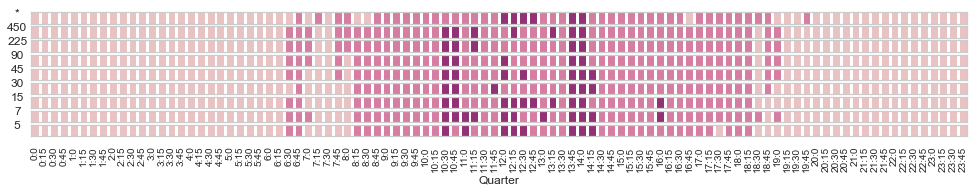

In [17]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(9)
plt.subplots_adjust(top=0.92, bottom=0.06, left=0.10, right=0.75, hspace=0.25, wspace=0.35)
sns.set_palette(["#F0BBBD",  "#E56F9F" , "#A2217C"])

fig.set_size_inches(20, 2);
test_g['placeholder'] = 1


sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_5", data = test_g, dodge=False, ax = ax[8])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_7", data = test_g, dodge=False, ax = ax[7])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_15", data = test_g, dodge=False, ax = ax[6])
sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_30", data = test_g, dodge=False, ax = ax[5])

sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_45", data = test_g, dodge=False, ax = ax[4])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_90", data = test_g, dodge=False, ax = ax[3])
sns.barplot(x ="Quarter" , y="placeholder", hue="y_pred_clf_225", data = test_g, dodge=False, ax = ax[2])
sns.barplot(x ="Quarter" , y="placeholder", hue = "y_pred_clf_450", data = test_g, dodge=False, ax = ax[1])

sns.barplot(x ="Quarter" , y="placeholder", hue="CQI_indicator", data = test_g, dodge=False, ax = ax[0])

axes = [ax[0] , ax[1] , ax[2] , ax[3] , ax[4] , ax[5] , ax[6] , ax[7] , ax[8]]

for axx in axes: 
    axx.get_yaxis().set_ticklabels([])
    axx.legend().remove()
    axx.margins(x=0)
    axx.margins(y=0)
    if axx != ax[8]:
        axx.get_xaxis().set_visible(False)
        
        
ax[8].set_ylabel('5', rotation=0, fontsize = 12)
ax[7].set_ylabel('7', rotation=0, fontsize =12)
ax[6].set_ylabel('15', rotation=0, fontsize = 12)
ax[5].set_ylabel('30', rotation=0, fontsize = 12)
ax[4].set_ylabel('45', rotation=0, fontsize = 12)
ax[3].set_ylabel('90', rotation=0, fontsize = 12)
ax[2].set_ylabel('225', rotation=0, fontsize = 12)
ax[1].set_ylabel('450', rotation=0, fontsize = 12)
ax[0].set_ylabel('*', rotation = 0 , fontsize = 12)


plt.xticks(rotation=90, fontsize=10)

In [18]:
pd.DataFrame (importance , columns= columns).mean()

weekday       0.323276
hour          0.261860
minute        0.079465
is_holiday    0.130967
is_class      0.204431
dtype: float64